In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../titan')
import titan_token
from titan_token import TokenEmissionSource, TokenNetwork

import numpy as np

In [10]:
# Create a network
network = TokenNetwork()

# Add inflationary rewards as a source
inflationary_rewards = TokenEmissionSource(
    name="inflation",
    emission_per_month=40250000/4.0,
    vesting_period=0,
    emission_cap=800_000_000
)
network.add_emission_source(inflationary_rewards)

team_allocation = TokenEmissionSource(
    name="team",
    emission_per_month=500000,
    vesting_period=0,
    emission_cap=20000000,
    start_month=0,
    end_month=40,
    vesting_function=titan_token.cliff_vesting,
    vesting_function_kwargs={'cliff_months': 6}
)
network.add_emission_source(team_allocation)

# # Add ecosystem fund with different schedule
# ecosystem_fund = TokenEmissionSource(
#     name="Ecosystem Fund",
#     emission_per_month=2000000,
#     vesting_period=24,
#     emission_cap=50000000,
#     start_month=6,  # Starts in month 6
#     end_month=30    # Ends in month 30
# )
# network.add_emission_source(ecosystem_fund)


In [11]:
# Simulate 
months_to_simulate = 20*12
metrics = network.simulate(months_to_simulate)

In [12]:
inflation_metrics = network.get_source_metrics("inflation")
team_metrics = network.get_source_metrics("team")

In [13]:
print(
    len(metrics['total_emission']), 
    len(inflation_metrics['total_emission']), 
    len(team_metrics['total_emission'])
)

240 240 240


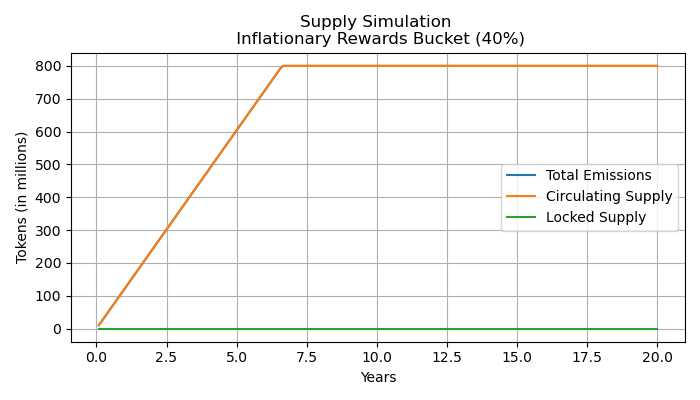

In [14]:
# Plotting
plt.figure(figsize=(7, 4))
plt.plot(np.arange(1, months_to_simulate + 1)/12, np.asarray(inflation_metrics['total_emission'])/1e6, label='Total Emissions')
plt.plot(np.arange(1, months_to_simulate + 1)/12, np.asarray(inflation_metrics['total_circulating'])/1e6, label='Circulating Supply')
plt.plot(np.arange(1, months_to_simulate + 1)/12, np.asarray(inflation_metrics['total_locked'])/1e6, label='Locked Supply')

plt.xlabel('Years')
plt.ylabel('Tokens (in millions)')
plt.title(f'Supply Simulation \n Inflationary Rewards Bucket (40%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

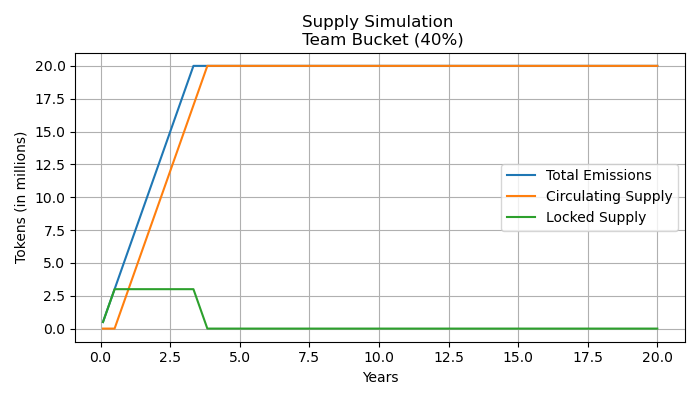

In [15]:
# Plotting
plt.figure(figsize=(7, 4))
plt.plot(np.arange(1, months_to_simulate + 1)/12, np.asarray(team_metrics['total_emission'])/1e6, label='Total Emissions')
plt.plot(np.arange(1, months_to_simulate + 1)/12, np.asarray(team_metrics['total_circulating'])/1e6, label='Circulating Supply')
plt.plot(np.arange(1, months_to_simulate + 1)/12, np.asarray(team_metrics['total_locked'])/1e6, label='Locked Supply')

plt.xlabel('Years')
plt.ylabel('Tokens (in millions)')
plt.title(f'Supply Simulation \n Team Bucket (40%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

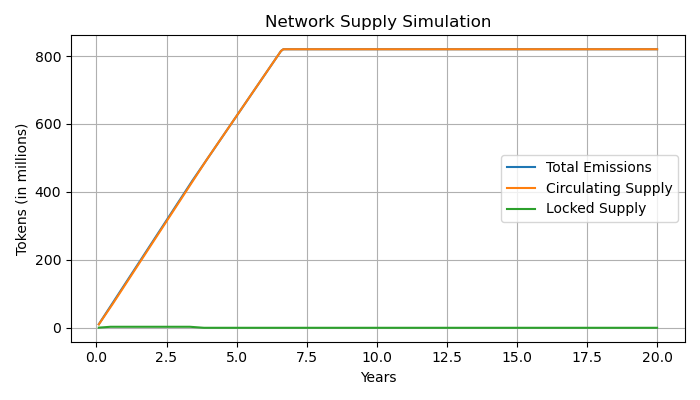

In [16]:
# Plotting
plt.figure(figsize=(7, 4))
plt.plot(np.arange(1, months_to_simulate + 1)/12, np.asarray(metrics['total_emission'])/1e6, label='Total Emissions')
plt.plot(np.arange(1, months_to_simulate + 1)/12, np.asarray(metrics['total_circulating'])/1e6, label='Circulating Supply')
plt.plot(np.arange(1, months_to_simulate + 1)/12, np.asarray(metrics['total_locked'])/1e6, label='Locked Supply')

plt.xlabel('Years')
plt.ylabel('Tokens (in millions)')
plt.title(f'Network Supply Simulation')
plt.legend()
plt.grid(True)
plt.tight_layout()